# Graded Assignment 4
## SQL and Exploratory Data Analysis

The following learn-by-building exercise will guide you through the process of building out a simple analysis along with some accompanying charts. This module is considerably more difficult than similar exercise blocks in the past, but it sure is a lot more rewarding!

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")


![](assets/chinookschema2.png)

Let's try by first constructing a DataFrame using the `read_sql_query()` method that we've grown familiar to. We want to develop a simple sales visualization report of our top 5 key markets (`Country` column in `customers`) ranked by Sales (`Total` column in `invoices`). 

We also want to identify our top 5 customers by name (`FirstName`, `LastName`) in the report.

Last but not least, we want the report to include a day-of-week analysis on sales performance, and for that we will need the `InvoiceDate` column. 

> **Hint 1**: `pandas` has built-in methods of extracting the name of day in a week. We've seen this in Part 2 of this specialization (**Working with Datetime chapter**). An example usage is:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`
>
>  **Hint 2**: In `read_sql_query`, you can use the `parse_dates='InvoiceDate'` argument to have the specified column parsed as date, saving you from a `to_datetime()` conversion

In [29]:
## Your code here

strSQL = """
SELECT b.FirstName, b.LastName, b.Country, a.Total, a.InvoiceDate
FROM invoices a
LEFT JOIN customers b
ON a.CustomerId=b.CustomerId
"""

dfData = pd.read_sql_query(strSQL, conn, parse_dates=['InvoiceDate'])
dfData['Day'] = dfData['InvoiceDate'].dt.day_name()
dfData['Customer'] = dfData['FirstName'] + ' ' + dfData['LastName']
dfData

,FirstName,LastName,Country,Total,InvoiceDate,Day,Customer
0,Leonie,Köhler,Germany,1.98,2009-01-01,Thursday,Leonie Köhler
1,Bjørn,Hansen,Norway,3.96,2009-01-02,Friday,Bjørn Hansen
2,Daan,Peeters,Belgium,5.94,2009-01-03,Saturday,Daan Peeters
3,Mark,Philips,Canada,8.91,2009-01-06,Tuesday,Mark Philips
4,John,Gordon,USA,13.86,2009-01-11,Sunday,John Gordon
...,...,...,...,...,...,...,...
407,Victor,Stevens,USA,3.96,2013-12-05,Thursday,Victor Stevens
408,Robert,Brown,Canada,5.94,2013-12-06,Friday,Robert Brown
409,Madalena,Sampaio,Portugal,8.91,2013-12-09,Monday,Madalena Sampaio
410,Terhi,Hämäläinen,Finland,13.86,2013-12-14,Saturday,Terhi Hämäläinen


In [33]:
pd.crosstab(index=dfData['Customer'], 
            columns='Total', 
            values=dfData['Total'], 
            aggfunc='sum').sort_values(by='Total', ascending=False).head()


col_0,Total
Customer,
Helena Holý,49.62
Richard Cunningham,47.62
Luis Rojas,46.62
Ladislav Kovács,45.62
Hugh O'Reilly,45.62


1. Which of the following customers are among the top 5 customers ranked by their respective total (`Total`)?
    - [ ] Victor Stevens
    - [x] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber	

In [34]:
## Your code here
pd.crosstab(index=dfData['Country'], 
            columns='Total', 
            values=dfData['Total'], 
            aggfunc='sum').sort_values(by='Total', ascending=False).head()


col_0,Total
Country,
USA,523.06
Canada,303.96
France,195.10
Brazil,190.10
Germany,156.48


2. Which of the following countries are among the top 5 grossing ranked by their respective total (`Total`)?
    - [ ] United Kingdom
    - [x] Germany
    - [ ] Portugal
    - [ ] India

In [57]:
## Your code here

top5 = dfData.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()
top5_data = dfData[dfData['Country'].isin(top5)].copy()
top5_data['InvoiceDOW']=top5_data['InvoiceDate'].dt.day_name()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                          categories=dayorder,
                                          ordered=True)
top5_data


,FirstName,LastName,Country,Total,InvoiceDate,Day,Customer,InvoiceDOW
0,Leonie,Köhler,Germany,1.98,2009-01-01,Thursday,Leonie Köhler,Thursday
3,Mark,Philips,Canada,8.91,2009-01-06,Tuesday,Mark Philips,Tuesday
4,John,Gordon,USA,13.86,2009-01-11,Sunday,John Gordon,Sunday
5,Fynn,Zimmermann,Germany,0.99,2009-01-19,Monday,Fynn Zimmermann,Monday
6,Niklas,Schröder,Germany,1.98,2009-02-01,Sunday,Niklas Schröder,Sunday
...,...,...,...,...,...,...,...,...
404,Dan,Miller,USA,0.99,2013-11-21,Thursday,Dan Miller,Thursday
405,Kathy,Chase,USA,1.98,2013-12-04,Wednesday,Kathy Chase,Wednesday
406,John,Gordon,USA,1.98,2013-12-04,Wednesday,John Gordon,Wednesday
407,Victor,Stevens,USA,3.96,2013-12-05,Thursday,Victor Stevens,Thursday


Use the code block below as reference to create a DataFrame containing records where the customers are from one of the top 5 countries. Notice that we have additionally converted our day-of-week column into a `Categorical` column:

```
top5 = ______.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = ______[______['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data
```

In [64]:
## Your code here
top5_data['InvoiceDate'].count()


245

3. How many sales transactions (or records, or rows) were from the top 5 countries?
    - [ ] 7
    - [x] 245
    - [ ] 412
    - [ ] 1715

In [63]:
## Your code here
pd.pivot_table(data=top5_data, 
               index='Country', 
               columns=['InvoiceDOW'], 
               values='Total', 
               aggfunc='sum',
               margins=True)

InvoiceDOW,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,All
Country,,,,,,,,
Brazil,19.80,1.98,26.73,45.56,16.83,63.36,15.84,190.10
Canada,43.56,22.78,90.09,43.58,58.41,23.76,21.78,303.96
France,25.75,1.98,11.88,47.52,1.98,87.15,18.84,195.10
Germany,64.35,9.90,24.75,3.96,8.91,38.67,5.94,156.48
USA,19.80,123.77,41.62,77.27,87.18,23.76,149.66,523.06
All,173.26,160.41,195.07,217.89,173.31,236.70,212.06,1368.70


4. Using the `pd.pivot_table()` method, answer the next two questions: How much sales (`Total`) did we make in total (`sum`) from the France market on a Tuesday? How much sales did we make in total from all the top 5 markets combined on a Friday?
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [x] 1.98 / 173.31
    - [ ] 1.98 / 326.77

<AxesSubplot:>

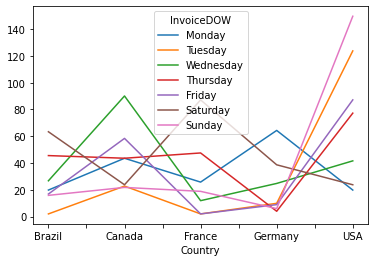

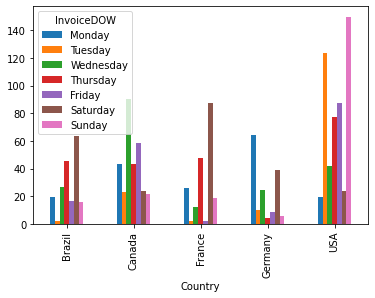

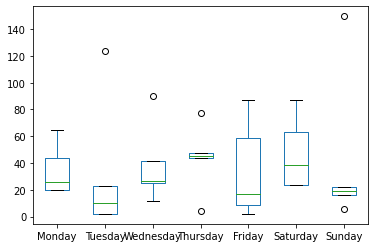

In [74]:
## Your code here

pvt = pd.pivot_table(data=top5_data, 
               index='Country', 
               columns=['InvoiceDOW'], 
               values='Total', 
               aggfunc='sum')

pvt.plot.line()
pvt.plot.bar()
#pvt.plot.scatter(x = 'Country', y = 'InvoiceDOW')
pvt.plot.box()


5. Give the `pivot_table` that you created a name. Remove the margins if they were included in the earlier step. Create a visualization by chaining the `.plot()` method on the pivot table. Set the `kind` parameter to be one of: `line`, `bar`, `scatter` & `box`. Which one is the **LEAST** appropriate plot type(s)?
    - [ ] `line`
    - [ ] `bar`
    - [x] `scatter`
    - [ ] `box`

In [86]:
## Your code here
genre = pd.read_sql_query(
 '''
 SELECT 
 BillingCountry AS Country, genres.Name AS Genre 
 FROM invoices 
 LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
 LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
 LEFT JOIN genres ON tracks.GenreId = genres.GenreId
 WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
 ''',conn)

#pd.read_sql_query('SELECT * from invoices',conn)
#pd.read_sql_query('SELECT * from invoice_items',conn)
#pd.read_sql_query('SELECT * from tracks',conn)
#pd.read_sql_query('SELECT * from genres',conn)


,Country,Genre
0,Germany,Rock
1,Germany,Rock
2,Canada,Rock
3,Canada,Rock
4,Canada,Rock
...,...,...
1325,Canada,Rock
1326,Canada,Rock
1327,Canada,Rock
1328,Canada,Rock


6. Suppose we want to compare the best-selling music genres in the top 5 countries. Let's try by first filling in the blanks (______) in the query below:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


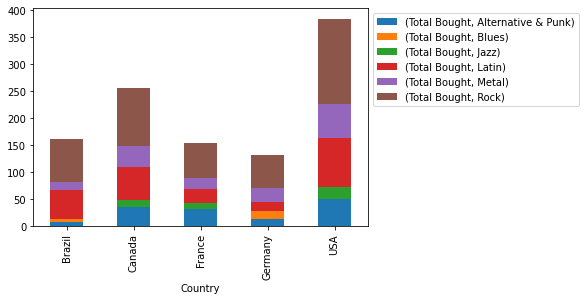

In [87]:
## Your code here
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 

Once you've completed the query for `genre` dataframe above, copy and run the code below to create a bar chart which compares the best-selling song genres per country.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```
What genre is **not** among the top-selling genre in Germany:
   - [ ] Blues
   - [ ] Jazz
   - [x] Alternative & Punk
   - [ ] Latin